In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
#import the .xsls
df = pd.read_excel('../data/return_data.xlsx', sheet_name=None)
# go from the dictionary to a dataframe
df = pd.concat(df, ignore_index=True)

In [9]:
df.head()

,PERMNO,date,TICKER,COMNAM,RET
0,10104.0,2015-12-28,ORCL,ORACLE CORP,-0.005944
1,10104.0,2015-12-29,ORCL,ORACLE CORP,0.006795
2,10104.0,2015-12-30,ORCL,ORACLE CORP,-0.003240
3,10104.0,2015-12-31,ORCL,ORACLE CORP,-0.010563
4,10104.0,2016-01-04,ORCL,ORACLE CORP,-0.017246


In [13]:
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

df['date'] = pd.to_datetime(df['date'])

wide = df.pivot_table(
    index='date',
    columns='TICKER',
    values='RET',
    aggfunc='mean'   # or 'first', 'last', 'sum', etc.
)

wide.columns.name = None


                   A        AA      AAPL  AAXN      ABBV       ABC       ABT  \
date                                                                           
2015-12-28 -0.008543 -0.013834 -0.011201   NaN  0.004961  0.002309 -0.001552   
2015-12-29  0.013882  0.015030  0.017974   NaN  0.011915  0.005567  0.017544   
2015-12-30 -0.004485 -0.016782 -0.013059   NaN  0.005887  0.002386 -0.012003   
2015-12-31 -0.005810 -0.009036 -0.019195   NaN -0.009365 -0.012474 -0.007952   
2016-01-04 -0.026788 -0.016211  0.000855   NaN -0.027515 -0.017742 -0.044088   

                 ACE      ACGL       ACN  ...       WWE        WY      WYNN  \
date                                      ...                                 
2015-12-28  0.000592  0.005386 -0.001439  ... -0.006393 -0.004883 -0.011999   
2015-12-29  0.015897  0.004229  0.011914  ...  0.003217  0.001309  0.026046   
2015-12-30 -0.010630 -0.008422  0.005127  ... -0.009086 -0.008821 -0.021107   
2015-12-31 -0.011421 -0.012599 -0.012847  ..

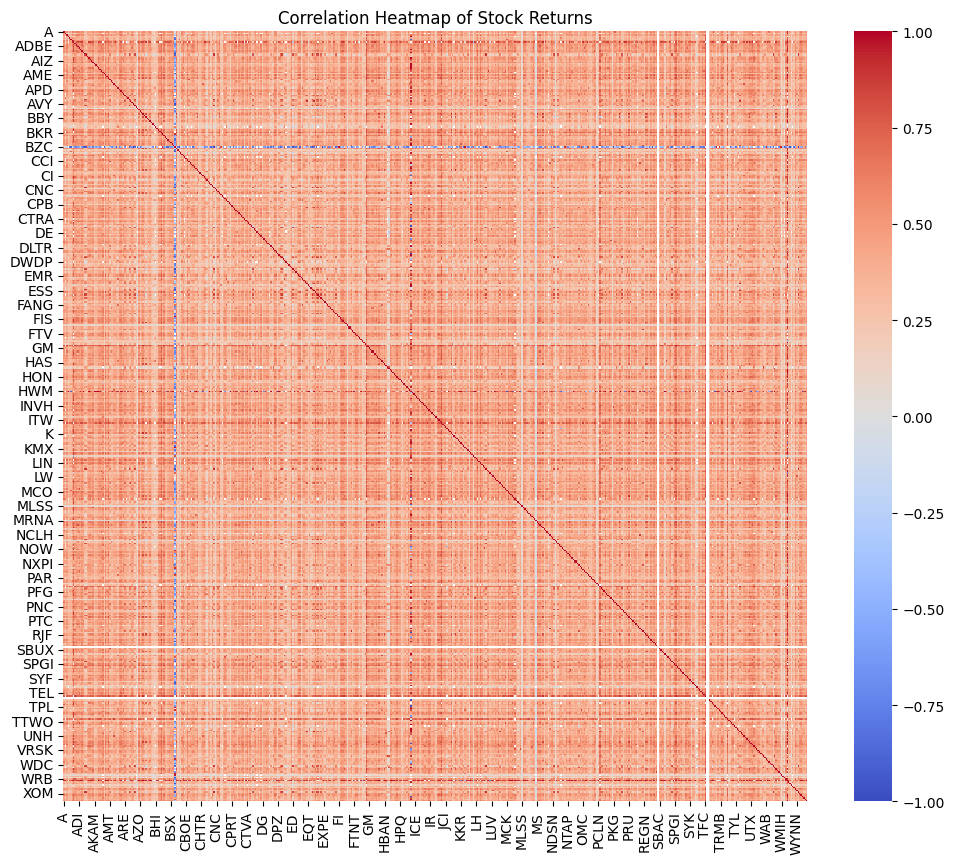

In [40]:
#Visualize the correlation among stocks in a heatmap
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(wide.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Stock Returns')
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(wide.fillna(0))  # Fill NaNs with 0 for scaling


In [42]:
from sklearn.decomposition import PCA

pca = PCA()  # or PCA(n_components=5) to keep only first 5 PCs
X_pca = pca.fit_transform(X_scaled)


In [44]:
# Variance explained
explained = pca.explained_variance_ratio_
print("Explained variance ratio:", explained)
print("Cumulative explained:", np.cumsum(explained))

# Loadings for the first few PCs
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)],
                        index=wide.columns)
print(loadings.head())

Explained variance ratio: [3.80407873e-01 5.21474254e-02 3.00420372e-02 2.12415884e-02
 1.38743901e-02 1.18662753e-02 1.06987209e-02 1.00146523e-02
 9.60758861e-03 8.80749218e-03 8.32028468e-03 7.49913318e-03
 7.29963676e-03 6.27887033e-03 6.26653844e-03 5.92958177e-03
 5.72947479e-03 5.10453517e-03 4.77160474e-03 4.68407289e-03
 4.43085192e-03 4.38797891e-03 4.16797860e-03 4.00723373e-03
 3.95807187e-03 3.75947012e-03 3.70376802e-03 3.52399872e-03
 3.50285305e-03 3.38293332e-03 3.32679730e-03 3.21375227e-03
 3.14179458e-03 3.07353912e-03 2.98611619e-03 2.94424469e-03
 2.90557910e-03 2.82048907e-03 2.78824325e-03 2.74626360e-03
 2.69648008e-03 2.67784937e-03 2.64633996e-03 2.60293356e-03
 2.57767961e-03 2.57515077e-03 2.52567713e-03 2.49213003e-03
 2.47613375e-03 2.46321350e-03 2.39967755e-03 2.35044311e-03
 2.34243539e-03 2.33234418e-03 2.29813158e-03 2.28202409e-03
 2.24302231e-03 2.20584915e-03 2.18543197e-03 2.14517481e-03
 2.13485628e-03 2.12552413e-03 2.11441606e-03 2.08950678e-0

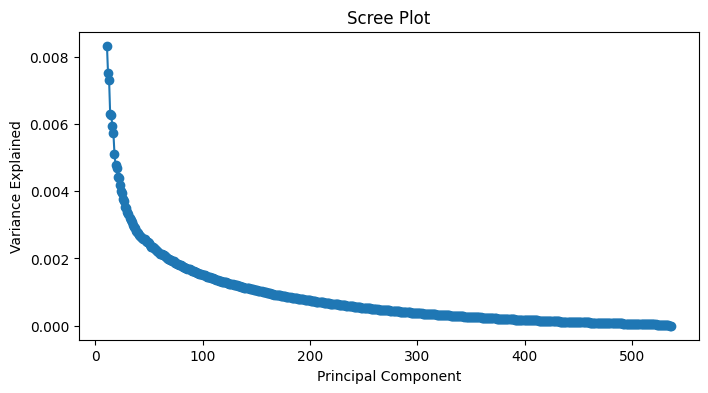

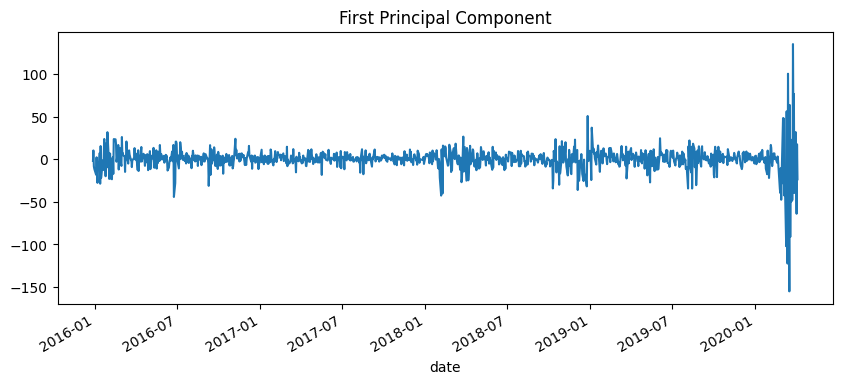

In [49]:
# Scree plot
plt.figure(figsize=(8,4))
plt.plot(range(11, len(explained)+1), explained[10:], marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

# First PC time series
import matplotlib.dates as mdates
pc1_series = pd.Series(X_pca[:,0], index=wide.index)
pc1_series.plot(figsize=(10,4), title="First Principal Component")
plt.show()

In [ ]:
#save the first 100 PC in a dataframe
PC_df = pd.DataFrame(X_pca[:,0:100])
#column names PC + number
PC_df.columns = 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.966053,4.684352,-0.408063,2.346106,-1.835890,-3.096474,-1.119865,0.099637,1.102616,-0.202063,...,-0.692359,-0.268379,0.688958,-1.120641,-0.033224,-0.481942,-0.155652,0.354880,0.082070,0.030309
1,10.354373,0.402857,-2.624404,0.411136,5.460169,-2.268578,2.399979,-1.634685,1.076425,0.992989,...,-0.687700,-3.054218,-0.130717,1.542066,-0.432631,2.796210,1.272605,-2.560276,0.806205,0.568315
2,-8.305774,1.300631,1.485676,0.350966,-2.890341,-0.168981,-1.259522,0.899244,0.193565,0.386674,...,-0.444962,-1.245014,-0.277825,0.333608,0.026255,-0.176296,-0.160166,0.037094,0.708943,-0.563255
3,-11.250333,-3.743274,4.773401,-2.204895,-2.498870,3.544658,0.592849,-0.378061,-1.619153,1.620061,...,-1.444695,1.496210,-0.191364,0.479416,-1.156011,4.642611,3.506297,-2.575849,1.312331,0.326034
4,-18.172278,-0.039038,6.669033,-3.526139,-3.445231,6.603999,-2.960893,4.049000,0.750645,-0.148228,...,0.894214,1.291995,0.540849,-0.757603,0.789683,-0.855417,-0.064064,0.465667,-0.174708,0.963067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,31.884614,14.076229,-19.628816,0.279367,-5.138507,1.339415,3.958672,5.969303,-8.303504,-1.757361,...,0.239293,3.078281,0.886039,1.115691,-4.235284,-1.651842,0.453416,1.576499,1.168441,2.283200
1071,-22.243121,-15.260369,1.319330,0.947747,3.146576,9.005477,1.213784,3.931363,-3.564170,2.352520,...,-1.834623,0.923295,-1.910587,-2.221959,-3.233225,0.483459,3.389587,-2.828778,0.203418,1.243389
1072,-63.957045,-3.361219,-20.244226,-3.797322,1.718881,3.310566,7.980627,10.132494,-4.987895,-4.864995,...,-1.582482,0.508572,-0.658673,0.266838,0.178643,0.354473,-1.995003,-0.244037,0.508691,-0.959585
1073,17.565182,8.214689,-10.059521,-6.705743,-6.007911,14.967017,13.395237,0.918276,-12.770507,-4.411584,...,-0.063737,1.016681,-0.164755,-0.941893,0.968787,0.617089,1.987571,0.084111,0.619975,0.943366
